In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline

In [36]:
columns = [
    "Возраст (лет)",
    "Количество иждивенцев", 
    "Доход (руб./мес.)", 
    "Срок проживания в регионе (лет)", 
    "Оценка автомобиля заемщика (USD)", 
    "Размер кредита (тыс. руб.)"
    ]

data = pd.read_excel('data/23MAG_HW_1_v2.xls', header=None, names=columns)

In [37]:
data

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,51.0,3.0,17600.0,17.0,20000.0,190000.0
1,NaN,2.0,12900.0,10.0,13000.0,127000.0
2,51.0,3.0,7100.0,17.0,NaN,82000.0
3,44.0,2.0,16000.0,13.0,17000.0,165000.0
4,49.0,3.0,14900.0,16.0,17000.0,159000.0
5,21.0,3.0,8200.0,11.0,48000.0,250000.0
6,35.0,2.0,29400.0,6.0,29000.0,NaN
7,32.0,2.0,NaN,5.0,36000.0,365000.0
8,32.0,1.0,27000.0,NaN,26000.0,261000.0
9,NaN,2.0,29000.0,7.0,28000.0,287000.0


# Первичная обработка данных

## 1. Основные характеристики

Рассмотрим базовые характеристика данных

In [61]:
data.describe()

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
count,42.000000,42.00000,42.000000,42.000000,42.000000,42.000000
mean,38.738095,2.00000,18661.904762,10.142857,21809.523810,196452.380952
std,8.557010,0.98773,9275.694764,4.760464,10760.673873,94850.897724
min,19.000000,0.00000,700.000000,1.000000,0.000000,3000.000000
25%,32.000000,1.00000,13400.000000,6.250000,17000.000000,152250.000000
50%,39.000000,2.00000,18700.000000,10.000000,22500.000000,200000.000000
75%,44.000000,3.00000,26175.000000,12.750000,26750.000000,261000.000000
max,56.000000,4.00000,38600.000000,20.000000,50000.000000,397000.000000


В среднем каждая колонка имеет по 2 пропущенных значения.

/tmp/ipykernel_1358/2345165677.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


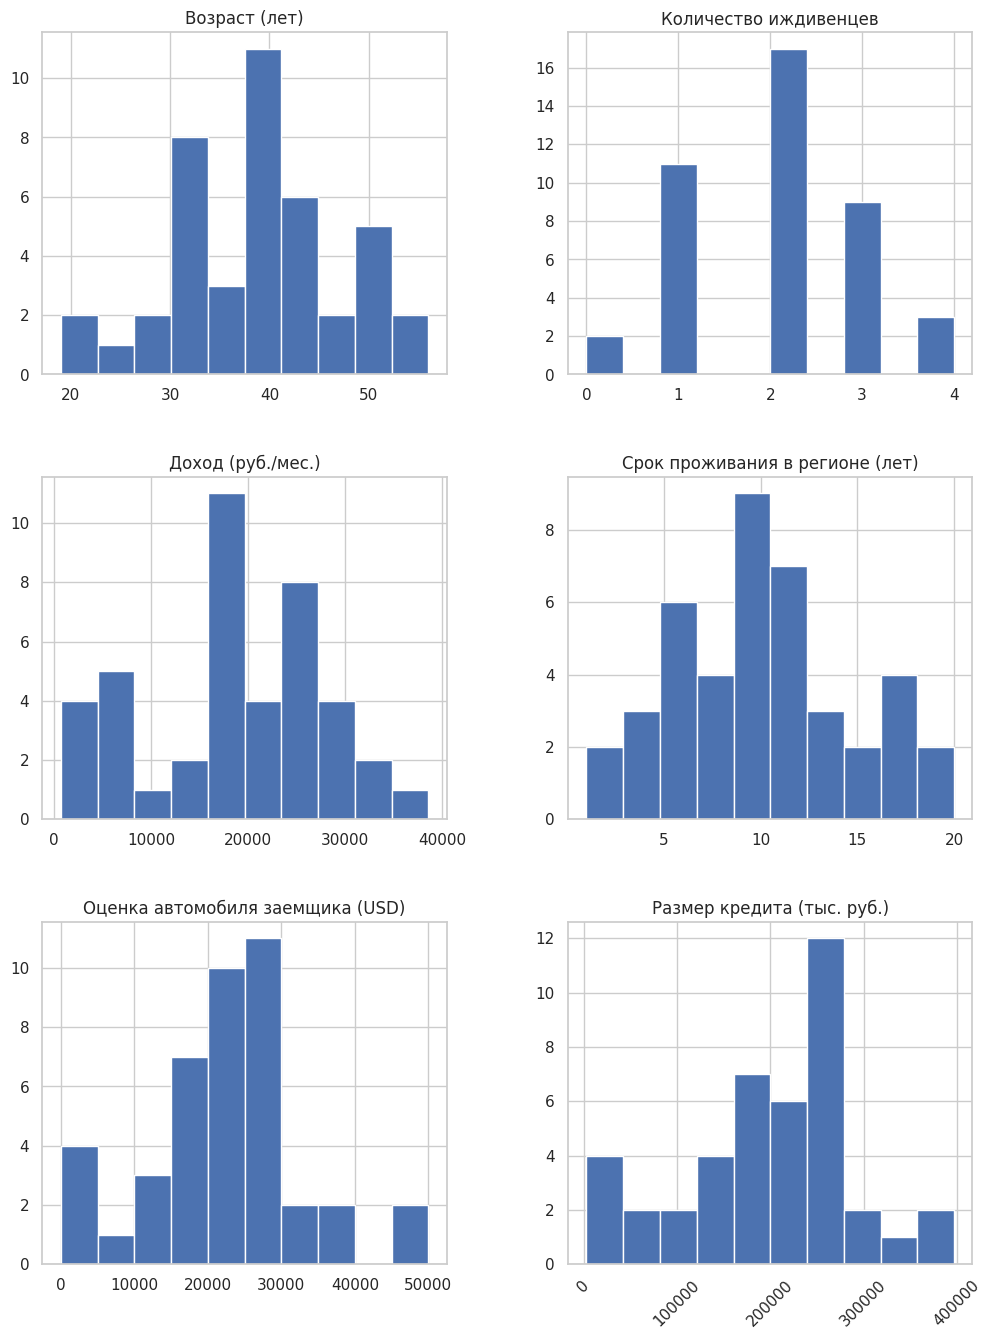

In [122]:
fig, ax = plt.subplots(figsize=(12, 16))
data.hist(ax=ax)
plt.xticks(rotation=45)
plt.show()

Как мы можем заметить по графикам, ближе всех к эллиптическому распрелению "Срок проживания в регионе", но и этому признаку присуща ассиметрия в хвостах, не характерная для эллиптических распределений.

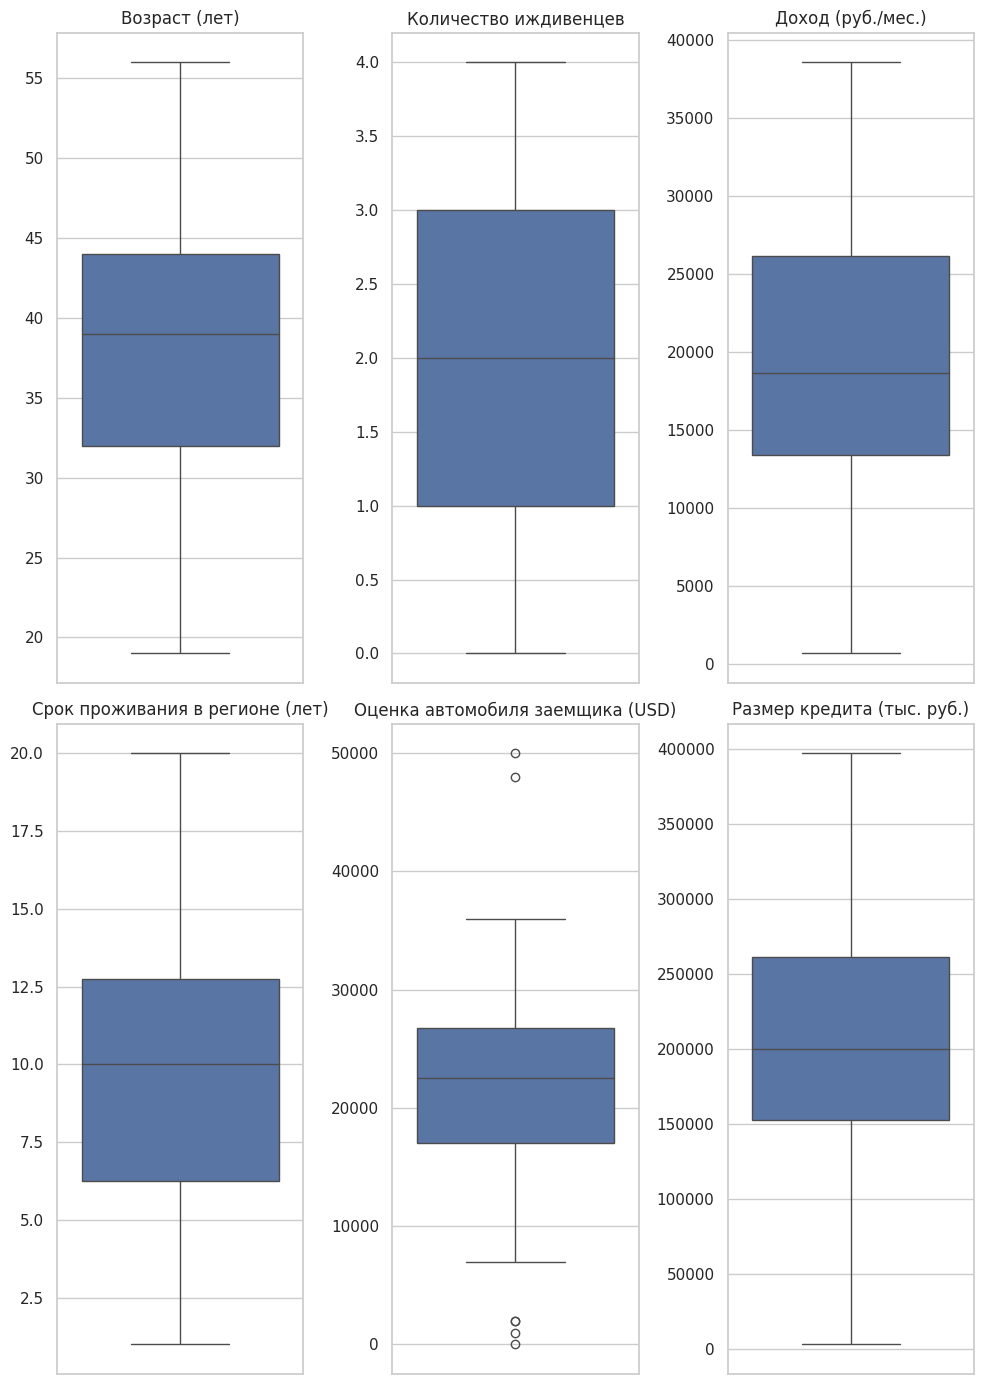

In [123]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(10, 14))

for i, column in enumerate(data.columns):
    col = i % 3
    row = i // 3
    sns.boxplot(y=data[column], ax=axes[row, col]) 
    axes[row, col].set_title(column)
    axes[row, col].set_ylabel("")

plt.tight_layout()
plt.show(axes.any())

Легко заметить, что признак "Оценка автомобиля заемщика" имеет большое количество выбросов.\
 Также обратим внимание, что медиана для многих параметров отличается от среднего

## 2. Заполнение пропусков медианными значениями

In [124]:
data_copy = data.copy() 
data.fillna(data.median(), inplace=True)

In [125]:
data.head()

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,51.0,3.0,17600.0,17.0,20000.0,190000.0
1,39.0,2.0,12900.0,10.0,13000.0,127000.0
2,51.0,3.0,7100.0,17.0,22500.0,82000.0
3,44.0,2.0,16000.0,13.0,17000.0,165000.0
4,49.0,3.0,14900.0,16.0,17000.0,159000.0


## 3. Контроль выбросов

Для того, чтобы провести контроль выбросов, возьмем значения, попадающие в интервал между квартилями 0.25 и 0.75

In [126]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.25 * IQR
upper_threshold = Q3 + 1.25 * IQR

data_no_outliers = data[(data >= lower_threshold) & (data <= upper_threshold)].dropna()


In [127]:
print(f'Количество объектов в очищенных данных => {len(data_no_outliers)}\nКоличество объектов в исходных данных => {len(data)}')

Количество объектов в очищенных данных => 35
Количество объектов в исходных данных => 42


In [128]:
data_no_outliers

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,51.0,3.0,17600.0,17.0,20000.0,190000.0
1,39.0,2.0,12900.0,10.0,13000.0,127000.0
2,51.0,3.0,7100.0,17.0,22500.0,82000.0
3,44.0,2.0,16000.0,13.0,17000.0,165000.0
4,49.0,3.0,14900.0,16.0,17000.0,159000.0
6,35.0,2.0,29400.0,6.0,29000.0,200000.0
7,32.0,2.0,18700.0,5.0,36000.0,365000.0
8,32.0,1.0,27000.0,10.0,26000.0,261000.0
9,39.0,2.0,29000.0,7.0,28000.0,287000.0
11,31.0,2.0,18200.0,5.0,16000.0,170000.0


# Снижение размерности. Метод PCA

## 4. Центрирование данных и нормировка

In [129]:
mean = np.mean(data_no_outliers, axis=0)
centered_data = data_no_outliers - mean

euclidean_norms = np.linalg.norm(centered_data, axis=0, ord=2)
normalized_data = centered_data / euclidean_norms
Z = normalized_data

Z.head()

,Возраст (лет),Количество иждивенцев,Доход (руб./мес.),Срок проживания в регионе (лет),Оценка автомобиля заемщика (USD),Размер кредита (тыс. руб.)
0,0.244615,0.166667,-0.073133,0.234279,-0.065640,-0.045009
1,-0.009688,0.000000,-0.188036,0.002834,-0.243341,-0.189471
2,0.244615,0.166667,-0.329831,0.234279,-0.002176,-0.292658
3,0.096272,0.000000,-0.112249,0.102025,-0.141798,-0.102335
4,0.202232,0.166667,-0.139141,0.201216,-0.141798,-0.116094


In [130]:
np.linalg.norm(Z, axis=0, ord=2)

array([1., 1., 1., 1., 1., 1.])

## 5. Разложение SVD

In [131]:
U, S, V = np.linalg.svd(Z)

print("Матрица U (левые сингулярные векторы):")
pd.DataFrame(U)

Матрица U (левые сингулярные векторы):


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.200301,-0.101647,0.015688,-0.002302,0.159989,0.006711,0.112243,0.136289,-0.046160,0.242398,...,0.068169,-0.001134,0.059377,0.149559,0.077921,0.173771,-0.348992,0.026282,0.005017,-0.368862
1,-0.121333,0.197961,0.049031,-0.106847,-0.036883,0.038298,-0.189496,0.044140,0.062542,-0.289623,...,-0.079558,-0.000805,0.228274,0.072182,-0.078460,0.036853,-0.090867,-0.642408,0.046153,-0.079007
2,-0.296055,0.025755,-0.340900,0.251413,-0.148653,-0.004365,-0.121749,0.149768,0.186756,-0.012043,...,0.049281,0.125805,-0.572838,0.164510,0.017899,0.169849,-0.040988,0.030537,-0.213457,0.124703
3,-0.122722,0.067106,0.019338,0.010171,0.174193,0.075989,0.284117,-0.483986,0.247088,0.182323,...,0.097569,0.122430,-0.215248,0.055545,0.028109,0.020952,0.022303,-0.478231,0.176551,0.128658
4,-0.223017,-0.017216,0.025449,-0.055296,0.066597,0.011558,0.498107,0.055732,0.045854,-0.152448,...,-0.085188,0.031412,0.200220,0.018736,-0.217625,0.022087,-0.055373,0.150850,-0.331024,0.079979
5,0.128468,-0.057525,0.122889,0.278676,-0.344910,-0.146640,0.310778,0.025589,-0.045730,-0.040340,...,0.005208,-0.031836,-0.199096,-0.029991,-0.043462,-0.031199,0.061998,-0.059769,0.137364,-0.002913
6,0.210471,-0.144227,-0.494197,-0.374157,-0.144021,-0.141863,0.562900,0.078594,-0.023827,-0.043073,...,-0.001422,-0.019557,0.006032,0.009167,0.083992,0.005202,0.004016,-0.109392,0.071414,-0.043317
7,0.152483,-0.028087,0.051613,0.087568,0.153630,0.476952,0.122171,0.742066,0.092997,0.061560,...,0.033798,0.039394,-0.052572,-0.016424,0.007897,-0.035489,0.065806,-0.219021,0.117232,0.091471
8,0.133223,-0.135370,0.091680,-0.006015,0.017868,-0.254728,-0.053407,0.085708,0.911973,-0.015599,...,-0.021671,-0.047360,0.130433,-0.033301,0.003708,-0.024784,-0.010780,0.111340,0.003260,-0.065009
9,0.028556,0.181264,0.126090,-0.226181,-0.297459,-0.046246,-0.033794,0.077040,0.016067,0.835733,...,-0.054257,0.001443,0.051700,0.002539,-0.071605,-0.004284,0.023984,-0.061326,-0.093811,0.056152


In [132]:
print("Сингулярные значения S:")
pd.DataFrame(S)

Сингулярные значения S:


,0
0,1.793760
1,1.428561
2,0.575182
3,0.430944
4,0.391422
5,0.268106


In [133]:
print("Матрица V (правые сингулярные векторы):")
pd.DataFrame(V)

Матрица V (правые сингулярные векторы):


,0,1,2,3,4,5
0,-0.475866,-0.406216,0.379697,-0.466998,0.317554,0.381370
1,-0.310030,-0.420827,-0.396680,-0.346217,-0.496230,-0.450911
2,-0.011989,0.148407,0.766813,-0.010347,-0.611949,-0.123453
3,0.260314,-0.401792,0.331446,0.109440,0.446238,-0.670700
4,0.480565,-0.667906,-0.014986,0.240066,-0.281238,0.431286
5,-0.615291,-0.168327,0.019800,0.769630,-0.014499,-0.012249


## 6. Исследование скрытых факторов

In [137]:
total_variance = np.sum(S**2)
explained_variance = np.cumsum(S**2)
threshold = 0.95 * total_variance

# Найдем число главных факторов, необходимых для объяснения выбранного порога
num_components = np.argmax(explained_variance >= threshold) + 1

print(f"Число главных факторов, объясняющих {threshold/total_variance:.0%} дисперсии: {num_components}")

Zk = np.dot(U[:, :num_components], np.dot(np.diag(S[:num_components]), V[:num_components, :]))

# Погрешность аппроксимации в спектральной матричной норме
spectral_norm_error = np.linalg.norm(Z - Zk, 'fro') / np.linalg.norm(Z, 'fro')

print(f"Число главных факторов: {num_components}")
print(f"Спектральная норма погрешности аппроксимации: {spectral_norm_error}")

Число главных факторов, объясняющих 95% дисперсии: 4
Число главных факторов: 4
Спектральная норма погрешности аппроксимации: 0.1936885497104876


## 7. Снижение размерности. Карта клиенов.

In [138]:
k = num_components

# Проведем проекцию данных на первые k главных факторов
client_projections = np.dot(Z, V.T[:, :k])
pd.DataFrame(client_projections)

,0,1,2,3
0,-0.359292,-0.145210,0.009024,-0.000992
1,-0.217642,0.282800,0.028202,-0.046045
2,-0.531052,0.036792,-0.196080,0.108345
3,-0.220134,0.095865,0.011123,0.004383
4,-0.400039,-0.024594,0.014638,-0.023830
5,0.230441,-0.082178,0.070684,0.120094
6,0.377534,-0.206038,-0.284253,-0.161241
7,0.273517,-0.040124,0.029687,0.037737
8,0.238970,-0.193384,0.052733,-0.002592
9,0.051222,0.258947,0.072525,-0.097471


# Снижение размерности. Интерпретация скрытых факторов.

## 8. Матрица коэффициентов разложения признаков $z^j$ по главным факторам.

In [52]:
V_k = V[:, :k].T

print("Матрица коэффициентов разложения:")
pd.DataFrame(V_k)

Матрица коэффициентов разложения:


,0,1,2,3,4,5
0,-0.475866,-0.310030,-0.011989,0.260314,0.480565,-0.615291
1,-0.406216,-0.420827,0.148407,-0.401792,-0.667906,-0.168327
2,0.379697,-0.396680,0.766813,0.331446,-0.014986,0.019800
3,-0.466998,-0.346217,-0.010347,0.109440,0.240066,0.769630


## 9. Интерпретация

Теперь у вас есть матрица коэффициентов разложения признаков по главным факторам. Вы можете исследовать структуру этой матрицы, чтобы выделить группы признаков, которые тесно связаны с каждым из главных факторов. Обычно, чем ближе коэффициент к 0, тем менее связан признак с данным главным фактором, а чем ближе к 1 или -1, тем более сильно связан.

Для интерпретации главных факторов на основе матрицы коэффициентов разложения, вам следует рассмотреть значения и знаки коэффициентов для каждого фактора и определить, какие признаки сильно влияют на каждый из главных факторов. Это может помочь вам понять, что каждый из главных факторов представляет собой в контексте ваших данных.

Например, если у вас есть главный фактор, для которого коэффициенты разложения признаков сильно положительные для возраста, количество иждивенцев и дохода, это может указывать на то, что этот фактор связан с общим финансовым положением клиентов. Если коэффициенты для оценки автомобиля и размера кредита отрицательные, это может указывать на то, что чем выше значения этих признаков, тем менее влияния они оказывают на этот главный фактор.

При интерпретации главных факторов также важно учитывать знаки коэффициентов, так как они могут указывать на направление влияния признаков на фактор.

Касательно карты клиентов, представленной в меньшей размерности, вы можете использовать эти главные факторы как новые "признаки" для каждого клиента и визуализировать их в этом новом многомерном пространстве. Это позволит вам сравнить и классифицировать клиентов на основе их позиции в этом пространстве и выделить группы клиентов с похожими характеристиками.

Напоминаю, что конкретные интерпретации могут сильно зависеть от вашего конкретного набора данных и бизнес-контекста.

# Снижение размерности. Метод MDS

## 10. Предложите способ вычисления расстояния между клиентами и вычислите матрицу расстояний. 

In [53]:
from scipy.spatial.distance import cdist

# Пусть client_projections содержит представления клиентов в меньшей размерности (размерности k)

# Вычисление матрицы расстояний между клиентами с использованием евклидова расстояния
euclidean_distances = cdist(client_projections, client_projections, 'euclidean')

# Вычисление матрицы расстояний между клиентами с использованием косинусного расстояния
# Нормализация векторов
normalized_projections = client_projections / np.linalg.norm(client_projections, axis=1, keepdims=True)
cosine_distances = cdist(normalized_projections, normalized_projections, 'cosine')


In [54]:
pd.DataFrame(cosine_distances)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000,0.732440,0.179971,0.299600,0.053171,1.644523,1.516419,1.847857,1.473914,1.490542,...,1.565498,1.527344,0.917725,1.932345,0.902545,1.933414,0.003691,0.243126,0.632484,0.243144
1,0.732440,0.000000,0.446058,0.134052,0.437117,1.757048,1.723383,1.708787,1.933533,0.345743,...,0.594575,1.907022,0.293145,1.556351,0.073327,1.549679,0.795853,1.334794,0.008627,1.410512
2,0.179971,0.446058,0.000000,0.144896,0.111852,1.776375,1.544295,1.916146,1.802916,1.252978,...,1.530406,1.844936,0.370735,1.947414,0.718488,1.951254,0.218827,0.682259,0.342556,0.662490
3,0.299600,0.134052,0.144896,0.000000,0.112048,1.846452,1.821895,1.942318,1.941114,0.800623,...,1.038973,1.952814,0.378805,1.884588,0.277321,1.882249,0.354212,0.902187,0.082583,0.933973
4,0.053171,0.437117,0.111852,0.112048,0.000000,1.813211,1.674029,1.965988,1.718233,1.201077,...,1.349422,1.754847,0.695112,1.986271,0.611222,1.984753,0.076650,0.458384,0.354510,0.486771
5,1.644523,1.757048,1.776375,1.846452,1.813211,0.000000,0.576069,0.076496,0.153104,1.196240,...,0.954220,0.152005,1.498275,0.163704,1.511843,0.172037,1.622459,1.240605,1.798276,1.118439
6,1.516419,1.723383,1.544295,1.821895,1.674029,0.576069,0.000000,0.359962,0.314534,1.247917,...,1.155038,0.305874,1.390156,0.392808,1.790970,0.392020,1.453549,0.961834,1.746613,0.996893
7,1.847857,1.708787,1.916146,1.942318,1.965988,0.076496,0.359962,0.000000,0.147729,0.974306,...,0.753576,0.123756,1.483906,0.024666,1.492309,0.027868,1.816113,1.372236,1.780796,1.317923
8,1.473914,1.933533,1.802916,1.941114,1.718233,0.153104,0.314534,0.147729,0.000000,1.372459,...,1.057040,0.002963,1.819890,0.246756,1.750209,0.249330,1.411140,0.832485,1.970256,0.790338
9,1.490542,0.345743,1.252978,0.800623,1.201077,1.196240,1.247917,0.974306,1.372459,0.000000,...,0.075630,1.301396,0.672982,0.761406,0.225539,0.750338,1.528541,1.733165,0.448265,1.844162


## 11. Проверьте, можно ли клиентов банка поместить в евклидово пространство размерности 2 с сохранением расстояний между клиентами.

In [55]:
from sklearn.manifold import MDS

# Пусть euclidean_distances содержит матрицу евклидовых расстояний между клиентами

# Создайте экземпляр MDS с размерностью 2 (можно выбрать другую размерность)
mds = MDS(n_components=2, dissimilarity='precomputed', normalized_stress=False)

# Примените MDS для вычисления новых представлений клиентов
client_embeddings = mds.fit_transform(euclidean_distances)

# client_embeddings содержит новые представления клиентов в 2D пространстве

In [102]:
client_embeddings

array([[ 0.35993995, -0.15241293],
       [ 0.22579004,  0.27340664],
       [ 0.58785309,  0.05187762],
       [ 0.22307177,  0.08950608],
       [ 0.39945   , -0.03469275],
       [-0.22966573, -0.08482072],
       [-0.49161839, -0.27589638],
       [-0.26638034, -0.02945287],
       [-0.22870866, -0.19079259],
       [-0.04616325,  0.27514525],
       [-0.11089933, -0.17376791],
       [-0.06791226,  0.39929976],
       [-0.3287237 ,  0.40485184],
       [-0.30670517,  0.09413089],
       [ 0.31761246,  0.30504304],
       [ 0.33445815, -0.1297578 ],
       [ 0.3231334 , -0.0082091 ],
       [-0.08987898,  0.16832512],
       [-0.25141457, -0.3422103 ],
       [-0.55980721, -0.14588401],
       [ 0.18124501, -0.11390877],
       [ 0.08078077, -0.34649293],
       [-0.30967295,  0.05144457],
       [-0.517922  ,  0.24067335],
       [-0.06122165, -0.37692848],
       [-0.02733677,  0.06735021],
       [-0.15878657, -0.11519015],
       [ 0.22510584,  0.51729855],
       [-0.38368636,

In [104]:
mds.stress_

0.8312962772682873

In [109]:
pd.DataFrame(client_embeddings).T

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.359940,0.225790,0.587853,0.223072,0.399450,-0.229666,-0.491618,-0.266380,-0.228709,-0.046163,...,-0.027337,-0.158787,0.225106,-0.383686,0.107000,-0.397682,0.538573,0.210575,0.453183,0.266416
1,-0.152413,0.273407,0.051878,0.089506,-0.034693,-0.084821,-0.275896,-0.029453,-0.190793,0.275145,...,0.067350,-0.115190,0.517299,0.041579,0.194834,0.047076,-0.276631,-0.349300,0.438720,-0.514214


## 12. Используйте любой из алгоритмов MDS для размещения объектов в евклидовом пространстве размерности 2 Оцените погрешность такого размещения. Постройте карту клиентов. Сравните с картой клиентов из п.7 и сделайте выводы.

In [110]:
from sklearn.metrics import mean_squared_error

original_distances = euclidean_distances
reconstructed_distances = np.sqrt(np.sum((client_embeddings[:, np.newaxis, :] - client_embeddings) ** 2, axis=2))
error = mean_squared_error(original_distances, reconstructed_distances)

# client_embeddings содержит новые представления клиентов в 2D пространстве
print("Погрешность размещения:", error)

Погрешность размещения: 0.0013468624313679716


In [113]:
pd.DataFrame(reconstructed_distances)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000,0.446451,0.306070,0.277953,0.124174,0.593467,0.860465,0.638276,0.589898,0.589683,...,0.445285,0.520060,0.683150,0.768514,0.429604,0.783446,0.217577,0.247132,0.598442,0.373694
1,0.446451,0.000000,0.424458,0.183921,0.353671,0.579454,0.903553,0.577889,0.649654,0.271959,...,0.326393,0.546724,0.243893,0.652078,0.142425,0.663282,0.632752,0.622892,0.281133,0.788668
2,0.306070,0.424458,0.000000,0.366717,0.207341,0.828869,1.128138,0.858096,0.851858,0.672179,...,0.615384,0.765103,0.590087,0.971594,0.501654,0.985547,0.332185,0.550710,0.409614,0.650985
3,0.277953,0.183921,0.366717,0.000000,0.215719,0.485140,0.802684,0.503701,0.531670,0.327031,...,0.251387,0.433262,0.427797,0.608648,0.156738,0.622202,0.483319,0.438984,0.418212,0.605274
4,0.124174,0.353671,0.207341,0.215719,0.000000,0.631110,0.923137,0.665851,0.647264,0.542744,...,0.438816,0.564011,0.578870,0.786842,0.371766,0.801315,0.279087,0.366949,0.476453,0.497633
5,0.593467,0.579454,0.828869,0.485140,0.631110,0.000000,0.324236,0.066435,0.105976,0.404040,...,0.253166,0.077111,0.754563,0.199247,0.437665,0.213603,0.791822,0.513577,0.860452,0.656107
6,0.860465,0.903553,1.128138,0.802684,0.923137,0.324236,0.000000,0.333866,0.276341,0.708574,...,0.577387,0.369599,1.069042,0.335321,0.761532,0.336356,1.030191,0.706019,1.184621,0.794614
7,0.638276,0.577889,0.858096,0.503701,0.665851,0.066435,0.333866,0.000000,0.165679,0.375866,...,0.257900,0.137577,0.735184,0.137136,0.435565,0.151977,0.842049,0.574272,0.858462,0.720323
8,0.589898,0.649654,0.851858,0.531670,0.647264,0.105976,0.276341,0.165679,0.000000,0.500421,...,0.327396,0.102980,0.841035,0.279311,0.511281,0.291777,0.772068,0.467006,0.928042,0.591397
9,0.589683,0.271959,0.672179,0.327031,0.542744,0.404040,0.708574,0.375866,0.500421,0.000000,...,0.208646,0.406258,0.363628,0.410457,0.172941,0.419024,0.803973,0.675163,0.525455,0.848996
